## Visualising the data

<ipython-input-11-41fad20b4377>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Moonlight', 'Non-Moonlight'], y=[num_entries_moonlight, num_entries_non_moonlight], palette=['blue', 'orange'])


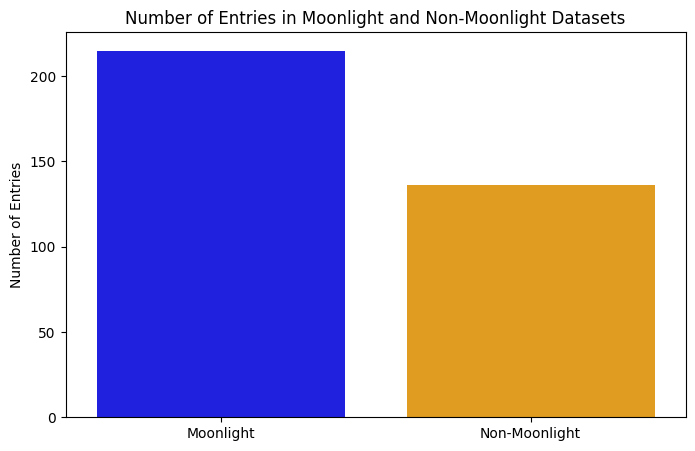

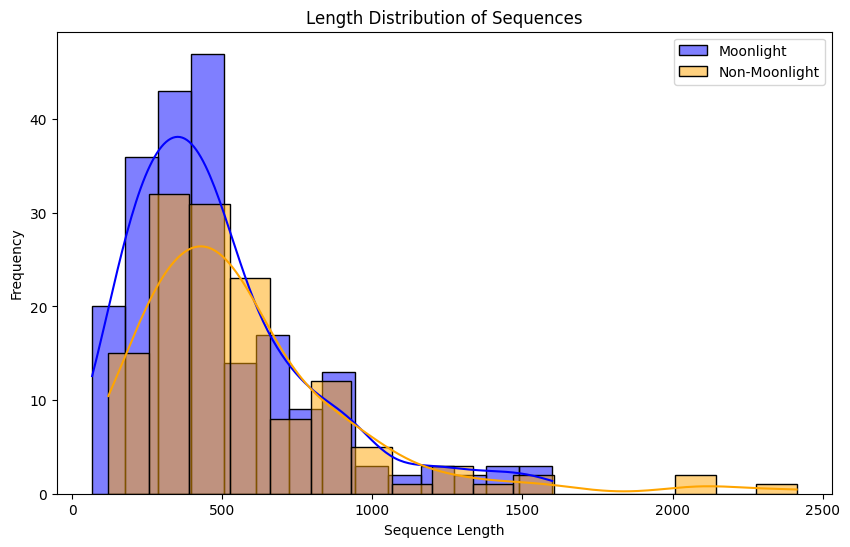

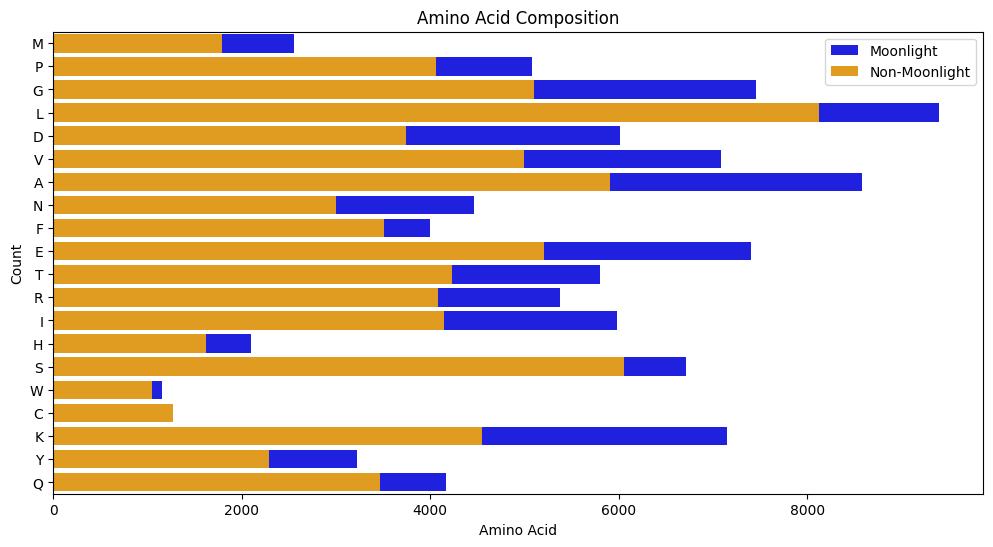

In [11]:
!pip install biopython
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO

moonlight_sequences = list(SeqIO.parse("moonlight.fasta", "fasta"))
non_moonlight_sequences = list(SeqIO.parse("nonMP.fasta", "fasta"))

num_entries_moonlight = len(moonlight_sequences)
num_entries_non_moonlight = len(non_moonlight_sequences)

# Plot the number of entries
plt.figure(figsize=(8, 5))
sns.barplot(x=['Moonlight', 'Non-Moonlight'], y=[num_entries_moonlight, num_entries_non_moonlight], palette=['blue', 'orange'])
plt.title('Number of Entries in Moonlight and Non-Moonlight Datasets')
plt.ylabel('Number of Entries')
plt.show()

# Visualize the length distribution of sequences
sequence_lengths_moonlight = [len(seq) for seq in moonlight_sequences]
sequence_lengths_non_moonlight = [len(seq) for seq in non_moonlight_sequences]

plt.figure(figsize=(10, 6))
sns.histplot(sequence_lengths_moonlight, label='Moonlight', color='blue', kde=True)
sns.histplot(sequence_lengths_non_moonlight, label='Non-Moonlight', color='orange', kde=True)
plt.title('Length Distribution of Sequences')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualize the composition of amino acids
amino_acids_moonlight = [aa for seq in moonlight_sequences for aa in seq.seq]
amino_acids_non_moonlight = [aa for seq in non_moonlight_sequences for aa in seq.seq]

plt.figure(figsize=(12, 6))
sns.countplot(amino_acids_moonlight, label='Moonlight', color='blue')
sns.countplot(amino_acids_non_moonlight, label='Non-Moonlight', color='orange')
plt.title('Amino Acid Composition')
plt.xlabel('Amino Acid')
plt.ylabel('Count')
plt.legend()
plt.show()


This clearly shows that the data is imbalanced. Hence, moving forward we will be using oversampling and other techniques to deal with that

## Using multiple Machine Learning models and combining accuracies using ensemble techniques

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

combined_data = pd.read_csv("combined_dataset.csv")

X = combined_data.drop(['Name', 'Label'], axis=1)
y = combined_data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define multiple models
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42, max_iter=1000),
    'ADA': AdaBoostClassifier(random_state=42),
    'LR': LogisticRegression(random_state=42, max_iter=1000)
}

# Train individual models and evaluate performance
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")


# Ensemble by averaging predictions
ensemble_preds = sum(model.predict(X_test) for model in models.values()) / len(models)
ensemble_accuracy = accuracy_score(y_test, np.round(ensemble_preds))
print("Ensemble Accuracy:", ensemble_accuracy)

SVM Accuracy: 0.7464788732394366
KNN Accuracy: 0.7183098591549296
NB Accuracy: 0.647887323943662
DT Accuracy: 0.676056338028169
RF Accuracy: 0.704225352112676
MLP Accuracy: 0.7464788732394366
ADA Accuracy: 0.6619718309859155
LR Accuracy: 0.704225352112676
Ensemble Accuracy: 0.7887323943661971


## Adding Oversampling as Moonlight protein data is larger than non moonlight data

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
from imblearn.over_sampling import SMOTE
from collections import Counter

combined_data = pd.read_csv("combined_dataset.csv")

X = combined_data.drop(['Name', 'Label'], axis=1)
y = combined_data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample the training data using SMOTE
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

print("Class distribution after oversampling:", Counter(y_train_resampled))

# Define multiple models
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42, max_iter=1000),
    'ADA': AdaBoostClassifier(random_state=42),
    'LR': LogisticRegression(random_state=42, max_iter=1000)
}

# Train individual models and evaluate performance
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

# Ensemble by averaging predictions
ensemble_preds = sum(model.predict(X_test) for model in models.values()) / len(models)
ensemble_accuracy = accuracy_score(y_test, np.round(ensemble_preds))
print("Ensemble Accuracy:", ensemble_accuracy)


Class distribution after oversampling: Counter({0: 173, 1: 173})
SVM Accuracy: 0.7323943661971831
KNN Accuracy: 0.704225352112676
NB Accuracy: 0.676056338028169
DT Accuracy: 0.6056338028169014
RF Accuracy: 0.7746478873239436
MLP Accuracy: 0.7464788732394366
ADA Accuracy: 0.676056338028169
LR Accuracy: 0.7183098591549296
Ensemble Accuracy: 0.7887323943661971


## Manually Augmenting data as the given dataset is quite small

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
from imblearn.over_sampling import SMOTE
from collections import Counter

combined_data = pd.read_csv("combined_dataset.csv")

X = combined_data.drop(['Name', 'Label'], axis=1)
y = combined_data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample the training data using SMOTE
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Print the distribution of classes after oversampling
print("Class distribution after oversampling:", Counter(y_train_resampled))

# Duplicate random rows to increase the dataset size to 3000 for both positive and negative data
positive_indices = y_train_resampled[y_train_resampled == 1].index
negative_indices = y_train_resampled[y_train_resampled == 0].index

# Duplicate positive samples
positive_duplicates = X_train_resampled.loc[positive_indices].sample(n=3000 - len(positive_indices), replace=True)
X_train_resampled = pd.concat([X_train_resampled, positive_duplicates])
y_train_resampled = pd.concat([y_train_resampled, pd.Series([1] * len(positive_duplicates))])

# Duplicate negative samples
negative_duplicates = X_train_resampled.loc[negative_indices].sample(n=3000 - len(negative_indices), replace=True)
X_train_resampled = pd.concat([X_train_resampled, negative_duplicates])
y_train_resampled = pd.concat([y_train_resampled, pd.Series([0] * len(negative_duplicates))])

# Print the new class distribution
print("New class distribution:", Counter(y_train_resampled))

# Define multiple models
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42),
    'ADA': AdaBoostClassifier(random_state=42),
    'LR': LogisticRegression(random_state=42, max_iter=1000),
}

# Train individual models and evaluate performance
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

# Ensemble by averaging predictions
ensemble_preds = sum(model.predict(X_test) for model in models.values()) / len(models)
ensemble_accuracy = accuracy_score(y_test, np.round(ensemble_preds))
print("Ensemble Accuracy:", ensemble_accuracy)

Class distribution after oversampling: Counter({0: 173, 1: 173})
New class distribution: Counter({0: 3000, 1: 3000})
SVM Accuracy: 0.7464788732394366
KNN Accuracy: 0.676056338028169
NB Accuracy: 0.6901408450704225
DT Accuracy: 0.5915492957746479
RF Accuracy: 0.7464788732394366
MLP Accuracy: 0.7464788732394366
ADA Accuracy: 0.7887323943661971
LR Accuracy: 0.7323943661971831
Ensemble Accuracy: 0.8028169014084507


## Applying standardisation

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import joblib
from imblearn.over_sampling import SMOTE
from collections import Counter

combined_data = pd.read_csv("combined_dataset.csv")

X = combined_data.drop(['Name', 'Label'], axis=1)
y = combined_data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample the training data using SMOTE
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

X_train_resampled_scaled_df = pd.DataFrame(X_train_resampled_scaled, columns=X_train.columns)

# Print the distribution of classes after oversampling
print("Class distribution after oversampling:", Counter(y_train_resampled))

# Duplicate random rows to increase the dataset size to 3000 for both positive and negative data
positive_indices = y_train_resampled[y_train_resampled == 1].index
negative_indices = y_train_resampled[y_train_resampled == 0].index

# Duplicate positive samples
positive_duplicates = X_train_resampled_scaled_df.loc[positive_indices].sample(n=3000 - len(positive_indices), replace=True)
X_train_resampled_scaled_df = pd.concat([X_train_resampled_scaled_df, positive_duplicates])
y_train_resampled = pd.concat([y_train_resampled, pd.Series([1] * len(positive_duplicates))])

# Duplicate negative samples
negative_duplicates = X_train_resampled_scaled_df.loc[negative_indices].sample(n=3000 - len(negative_indices), replace=True)
X_train_resampled_scaled_df = pd.concat([X_train_resampled_scaled_df, negative_duplicates])
y_train_resampled = pd.concat([y_train_resampled, pd.Series([0] * len(negative_duplicates))])

# Print the new class distribution
print("New class distribution:", Counter(y_train_resampled))

# Define multiple models
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42),
    'ADA': AdaBoostClassifier(random_state=42),
    'LR': LogisticRegression(random_state=42, max_iter=1000),
}

# Train individual models and evaluate performance
for model_name, model in models.items():
    model.fit(X_train_resampled_scaled_df.values, y_train_resampled.values)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

# Ensemble by averaging predictions
ensemble_preds = sum(model.predict(X_test_scaled) for model in models.values()) / len(models)
ensemble_accuracy = accuracy_score(y_test, np.round(ensemble_preds))
print("Ensemble Accuracy:", ensemble_accuracy)


Class distribution after oversampling: Counter({0: 173, 1: 173})
New class distribution: Counter({0: 3000, 1: 3000})
SVM Accuracy: 0.7464788732394366
KNN Accuracy: 0.7183098591549296
NB Accuracy: 0.704225352112676
DT Accuracy: 0.647887323943662
RF Accuracy: 0.7323943661971831
MLP Accuracy: 0.7887323943661971
ADA Accuracy: 0.7183098591549296
LR Accuracy: 0.7323943661971831
Ensemble Accuracy: 0.8309859154929577


## Now applying stratified K-fold technique

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

combined_data = pd.read_csv("combined_dataset.csv")

X = combined_data.drop(['Name', 'Label'], axis=1)
y = combined_data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample the training data using SMOTE
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

X_train_resampled_scaled_df = pd.DataFrame(X_train_resampled_scaled, columns=X_train.columns)

# Print the distribution of classes after oversampling
print("Class distribution after oversampling:", Counter(y_train_resampled))

# Duplicate random rows to increase the dataset size to 3000 for both positive and negative data
positive_indices = y_train_resampled[y_train_resampled == 1].index
negative_indices = y_train_resampled[y_train_resampled == 0].index

# Duplicate positive samples
positive_duplicates = X_train_resampled_scaled_df.loc[positive_indices].sample(n=3000 - len(positive_indices), replace=True)
X_train_resampled_scaled_df = pd.concat([X_train_resampled_scaled_df, positive_duplicates])
y_train_resampled = pd.concat([y_train_resampled, pd.Series([1] * len(positive_duplicates))])

# Duplicate negative samples
negative_duplicates = X_train_resampled_scaled_df.loc[negative_indices].sample(n=3000 - len(negative_indices), replace=True)
X_train_resampled_scaled_df = pd.concat([X_train_resampled_scaled_df, negative_duplicates])
y_train_resampled = pd.concat([y_train_resampled, pd.Series([0] * len(negative_duplicates))])

# Print the new class distribution
print("New class distribution:", Counter(y_train_resampled))

# Define multiple models
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(random_state=42),
    'MLP': MLPClassifier(random_state=42, max_iter=1000),
    'ADA': AdaBoostClassifier(random_state=42),
    'LR': LogisticRegression(random_state=42, max_iter=1000),
}

# Perform cross-validation for each model and store the results
for model_name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X_train_resampled_scaled_df, y_train_resampled, scoring='accuracy', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores)}")

    # Optionally, you can use the entire dataset for training
    model.fit(X_train_resampled_scaled_df.values, y_train_resampled.values)

    # Evaluate on the test set and generate a classification report
    predictions = model.predict(X_test_scaled)
    report = classification_report(y_test, predictions)
    print(f"{model_name} Classification Report:\n{report}\n")

Class distribution after oversampling: Counter({0: 173, 1: 173})
New class distribution: Counter({0: 3000, 1: 3000})
SVM Cross-Validation Accuracy: 0.9878333333333333
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        29
           1       0.77      0.81      0.79        42

    accuracy                           0.75        71
   macro avg       0.74      0.73      0.73        71
weighted avg       0.74      0.75      0.74        71


KNN Cross-Validation Accuracy: 0.9921666666666666
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.59      0.63        29
           1       0.74      0.81      0.77        42

    accuracy                           0.72        71
   macro avg       0.71      0.70      0.70        71
weighted avg       0.71      0.72      0.71        71


NB Cross-Validation Accuracy: 0.6251666666666666
NB Classification Report